# Trade with Python through MetaTrader5

In [44]:
# documentation: https://www.mql5.com/en/docs/integration/python_metatrader5

import MetaTrader5 as mt  # pip install MetaTrader5
import pandas as pd  # pip install pandas
from datetime import datetime, timedelta
import os

In [28]:
# start the platform with initialize()
mt.initialize()

True

In [29]:
# login to Trade Account with login()
# make sure that trade server is enabled in MT5 client terminal

login = 165905041
password = 'iIeElL0176_'
server = 'XMGlobal-MT5 2'

mt.login(login, password, server)



True

In [30]:
# get account info
account_info = mt.account_info()
print(account_info)

# getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

print()
print('login: ', login_number)
print('balance: ', balance)
print('equity: ', equity)

AccountInfo(login=165905041, trade_mode=0, leverage=1000, limit_orders=300, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=10000.0, credit=0.0, profit=0.0, equity=10000.0, margin=0.0, margin_free=10000.0, margin_level=0.0, margin_so_call=50.0, margin_so_so=20.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Demo Account', server='XMGlobal-MT5 2', currency='USD', company='XM Global Limited')

login:  165905041
balance:  10000.0
equity:  10000.0


In [31]:
request = {
        "action":mt.TRADE_ACTION_DEAL,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY,
        "price": mt.symbol_info_tick("EURUSD").ask,
        "volume":0.01,
        "deviation": 200,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)

OrderSendResult(retcode=10027, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='AutoTrading disabled by client', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.04053, stoplimit=0.0, sl=0.0, tp=0.0, deviation=200, type=0, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))

In [32]:
# get number of symbols with symbols_total()
num_symbols = mt.symbols_total()

num_symbols

1506

In [33]:
# get all symbols and their specifications
symbols = mt.symbols_get()
symbols

(SymbolInfo(custom=False, chart_mode=0, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=5, spread=0, spread_float=True, ticks_bookdepth=0, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=2, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=15, filling_mode=2, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1e-05, trade_tick_value=0.0, trade_tick_value_profit=0.0, trade_tick_value_loss=0.0, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=0.01, volume_max=50.0, volume_step=0.01, volume_limit=0.0, swa

In [43]:
# Extract currency pair names
currency_pairs = [symbol.name for symbol in symbols if 'Forex\\Standard\\Majors\\' in symbol.path]

print(currency_pairs)

['CADCHF', 'CADJPY', 'CHFJPY', 'EURCAD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCAD', 'GBPCHF', 'GBPJPY', 'GBPUSD', 'USDCAD', 'USDCHF', 'USDJPY']


In [46]:

# currency_pairs
# List of pairs to download
pairs = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'USDCHF', 'USDCAD']  # Example pairs, you can add more.

# Function to create the necessary directories and save the data
def download_ohlc_data(symbol, start_year):
    # Base directory for saving files
    base_dir = f'ohlc_data/{symbol}'
    
    # Create the directory for the symbol if it doesn't exist
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    file_path = os.path.join(base_dir, f'H1_{symbol}_{start_year}.csv')

    # Download OHLC data for the given symbol and year range
    ohlc_data = pd.DataFrame(mt.copy_rates_range(symbol, 
                                                 mt.TIMEFRAME_H1, 
                                                 datetime(start_year, 1, 1), 
                                                 datetime.now()))

    # Check if data was retrieved successfully
    if not ohlc_data.empty:
        ohlc_data.to_csv(file_path)
        print(f"Downloaded and saved data for {symbol} ({start_year})")
    else:
        print(f"No data found for {symbol} ({start_year})")

# Connect to MetaTrader 5
if not mt.initialize():
    print("MetaTrader5 initialization failed!")
else:
    # Define start and end year
    start_year = 2015
    
    # Download data for each pair
    for pair in pairs:
        download_ohlc_data(pair, start_year)

    # Shutdown MetaTrader5 after downloading data
    mt.shutdown()


Downloaded and saved data for EURUSD (2015)
Downloaded and saved data for GBPUSD (2015)
Downloaded and saved data for USDJPY (2015)
Downloaded and saved data for AUDUSD (2015)
Downloaded and saved data for USDCHF (2015)
Downloaded and saved data for USDCAD (2015)


In [34]:
# get symbol specifications
symbol_info = mt.symbol_info("EURUSD")._asdict()
symbol_info

{'custom': False,
 'chart_mode': 0,
 'select': True,
 'visible': True,
 'session_deals': 0,
 'session_buy_orders': 0,
 'session_sell_orders': 0,
 'volume': 0,
 'volumehigh': 0,
 'volumelow': 0,
 'time': 1734708625,
 'digits': 5,
 'spread': 27,
 'spread_float': True,
 'ticks_bookdepth': 0,
 'trade_calc_mode': 0,
 'trade_mode': 4,
 'start_time': 0,
 'expiration_time': 0,
 'trade_stops_level': 0,
 'trade_freeze_level': 0,
 'trade_exemode': 2,
 'swap_mode': 1,
 'swap_rollover3days': 3,
 'margin_hedged_use_leg': False,
 'expiration_mode': 15,
 'filling_mode': 2,
 'order_mode': 127,
 'order_gtc_mode': 0,
 'option_mode': 0,
 'option_right': 0,
 'bid': 1.04041,
 'bidhigh': 1.04063,
 'bidlow': 1.03419,
 'ask': 1.04068,
 'askhigh': 1.04087,
 'asklow': 1.0344,
 'last': 0.0,
 'lasthigh': 0.0,
 'lastlow': 0.0,
 'volume_real': 0.0,
 'volumehigh_real': 0.0,
 'volumelow_real': 0.0,
 'option_strike': 0.0,
 'point': 1e-05,
 'trade_tick_value': 1.0,
 'trade_tick_value_profit': 1.0,
 'trade_tick_value_los

In [35]:
# get current symbol price
symbol_price = mt.symbol_info_tick("EURUSD")._asdict()
symbol_price

{'time': 1734708627,
 'bid': 1.04066,
 'ask': 1.04089,
 'last': 0.0,
 'volume': 0,
 'time_msc': 1734708627048,
 'flags': 1124,
 'volume_real': 0.0}

In [36]:
symbol_price['ask']

1.04089

In [37]:
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_D1, 
                                             datetime(2021, 1, 1), 
                                             datetime.now()))

fig = px.line(ohlc_data, x=ohlc_data['time'], y=ohlc_data['close'])
fig.show()



NameError: name 'px' is not defined

In [38]:
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_H1, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))

ohlc_data.to_csv('H1_EURUSD_2015.csv')

In [39]:
ohlc_data

,time,open,high,low,close,tick_volume,spread,real_volume
0,1420048800,1.20997,1.21089,1.20966,1.20999,3237,17,0
1,1420185600,1.20481,1.20569,1.20479,1.20538,1254,17,0
2,1420189200,1.20537,1.20574,1.20341,1.20553,3394,17,0
3,1420192800,1.20556,1.20689,1.20442,1.20469,4590,17,0
4,1420196400,1.20468,1.20599,1.20380,1.20573,4335,17,0
...,...,...,...,...,...,...,...,...
61932,1734685200,1.03737,1.03842,1.03715,1.03817,5316,17,0
61933,1734688800,1.03816,1.03974,1.03770,1.03913,5104,17,0
61934,1734692400,1.03913,1.03915,1.03749,1.03817,4389,17,0
61935,1734696000,1.03818,1.03921,1.03803,1.03908,3521,17,0


<Axes: >

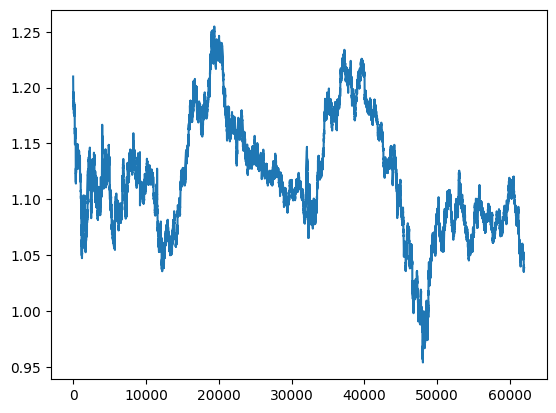

In [22]:
ohlc_data['close'].plot()

In [5]:
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_H4, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('H4_EURUSD_2015.csv')

In [9]:

# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_D1, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('D1_EURUSD_2015.csv')
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_M30, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('M30_EURUSD_2015.csv')


In [21]:
symbol ="EURUSD"
end_time = datetime.now()
timeframe = mt.TIMEFRAME_M30
start_time = datetime(2015, 1, 1)

rates = mt.copy_rates_range(symbol, timeframe, start_time, datetime.now())

if rates is not None:
    print("Data downloaded successfully!")
    # Print the downloaded data
#     for rate in rates:
#         print('Printing first sample: ', rate)
#         break

    ohlc_data = pd.DataFrame(rates)
    ohlc_data.to_csv('M30_EURUSD_2015.csv')
    
else:
    print("Data not available for the specified time range.")

    # Loop to try pulling most recent available data
    while True:
        start_time = end_time - timedelta(days=365)  # Adjust this period as needed
        rates = mt.copy_rates_range(symbol, timeframe, start_time, end_time)
        
#         if rates is not None:
#             print("Most recent data downloaded successfully!")
            # Print the downloaded data
#             for rate in rates:
#                 print(rate)
#             break
        if rates is None:
            print("Failed to download most recent data. Trying again...")
        else:
            print("Data downloaded successfully!")
            ohlc_data = pd.DataFrame(rates)
            ohlc_data.to_csv('M30_EURUSD_2015.csv')
            break

Data not available for the specified time range.
Data downloaded successfully!


In [20]:
ohlc_data

,time,open,high,low,close,tick_volume,spread,real_volume
0,1684108800,1.08608,1.08608,1.08500,1.08533,101,22,0
1,1684110600,1.08530,1.08544,1.08521,1.08522,84,29,0
2,1684112400,1.08520,1.08520,1.08446,1.08498,623,16,0
3,1684114200,1.08498,1.08520,1.08489,1.08491,443,17,0
4,1684116000,1.08492,1.08512,1.08469,1.08509,451,16,0
...,...,...,...,...,...,...,...,...
12379,1715376600,1.07699,1.07726,1.07688,1.07726,855,18,0
12380,1715378400,1.07725,1.07748,1.07712,1.07736,1007,18,0
12381,1715380200,1.07736,1.07736,1.07707,1.07707,865,18,0
12382,1715382000,1.07707,1.07712,1.07689,1.07706,388,20,0


In [26]:
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_M30, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('M30_EURUSD_2015.csv')

In [14]:
ohlc_data.to_csv('H4_EURUSD_2015.csv')

<Axes: >

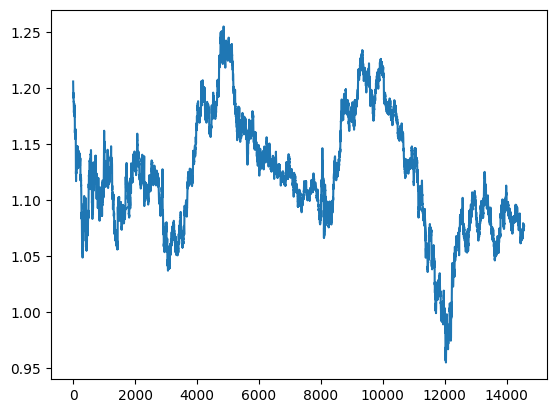

In [15]:
ohlc_data.close.plot()

In [17]:
ohlc_data

,time,open,high,low,close,tick_volume,spread,real_volume
0,1420185600,1.20481,1.20689,1.20341,1.20573,13573,17,0
1,1420200000,1.20573,1.20576,1.20248,1.20303,11302,17,0
2,1420214400,1.20302,1.20329,1.20031,1.20090,16214,17,0
3,1420228800,1.20093,1.20149,1.19993,1.20002,5820,17,0
4,1420416000,1.19511,1.19754,1.18599,1.19539,15220,17,0
...,...,...,...,...,...,...,...,...
14561,1715313600,1.07783,1.07817,1.07721,1.07730,3353,18,0
14562,1715328000,1.07729,1.07858,1.07706,1.07797,8836,18,0
14563,1715342400,1.07800,1.07852,1.07653,1.07691,9909,18,0
14564,1715356800,1.07695,1.07891,1.07594,1.07749,14820,18,0


In [12]:
# requesting tick data
tick_data = pd.DataFrame(mt.copy_ticks_range("EURUSD", 
                                             datetime(2023, 10, 4), 
                                             datetime.now(), 
                                             mt.COPY_TICKS_ALL))

fig = px.line(tick_data, x=tick_data['time'], y=[tick_data['bid'], tick_data['ask']])
fig.show()

# tick_data

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

In [39]:
# total number of orders
num_orders = mt.orders_total()
num_orders

0

In [38]:
# list of orders
orders = mt.orders_get()
orders

()

In [37]:
# total number of positions
num_positions = mt.positions_total()
num_positions

0

In [95]:
# list of positions
positions = mt.positions_get()
positions

()

In [106]:
# number of history orders
num_order_history = mt.history_orders_total(datetime(2021, 1, 1), datetime(2021, 10, 6))
num_order_history

0

In [97]:
# list of history orders
order_history = mt.history_orders_get(datetime(2021, 1, 1), datetime(2021, 10, 6))
order_history

()

In [98]:
# number of history deals
num_deal_history = mt.history_deals_total(datetime(2021, 1, 1),  datetime(2021, 10, 6))
num_deal_history

0

In [99]:
# number of history deals
deal_history = mt.history_deals_get(datetime(2021, 1, 1), datetime(2021, 10, 6))
deal_history

()

In [100]:
# send order to the market
# documentation: https://www.mql5.com/en/docs/integration/python_metatrader5/mt5ordersend_py

request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": "EURUSD",
    "volume": 0.01, # FLOAT
    "type": mt.ORDER_TYPE_SELL,
    "price": mt.symbol_info_tick("EURUSD").ask,
    "sl": 0.0, # FLOAT
    "tp": 0.0, # FLOAT
    "deviation": 20, # INTERGER
    "magic": 234000, # INTERGER
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}

order = mt.order_send(request)
print(order)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=0.01, price=1.09109, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))


In [68]:
# close position

request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": "EURUSD",
    "volume": 2.0, # FLOAT
    "type": mt.ORDER_TYPE_SELL,
    "position": 158631228, # select the position you want to close
    "price": mt.symbol_info_tick("EURUSD").ask,
    "sl": 0.0, # FLOAT
    "tp": 0.0, # FLOAT
    "deviation": 20, # INTERGER
    "magic": 234000, # INTERGER
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}

order = mt.order_send(request)
print(order)

OrderSendResult(retcode=10013, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Invalid request', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=2.0, price=1.09128, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python script open', position=158631228, position_by=0))


In [60]:
rates = mt.copy_rates_from_pos('EURUSD', mt.TIMEFRAME_M5, 0, 864)  
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
max_value = rates_frame['high'].max() #The highest value reached by the price
min_value = rates_frame['low'].min() #The minimum value reached by the prices

In [114]:
request = {
        "action":mt.TRADE_ACTION_PENDING,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY_LIMIT,
        "price": min_value,
        "volume":1.0,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)



OrderSendResult(retcode=10009, deal=0, order=19477097, volume=1.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=2131559406, retcode_external=0, request=TradeRequest(action=5, magic=0, order=0, symbol='EURUSD', volume=1.0, price=1.08918, stoplimit=0.0, sl=0.0, tp=0.0, deviation=0, type=2, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))

In [83]:
symbol = "EURUSD"
lot = 0.1
point = mt.symbol_info(symbol).point
price = mt.symbol_info_tick(symbol).ask

In [86]:
price

1.09125

In [108]:
symbol = 'EURUSD'
lot = 0.1
point = mt.symbol_info(symbol).point
price = mt.symbol_info_tick(symbol).ask
deviation = 20
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 100 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}
mt.order_send(request)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=0.1, price=1.09273, stoplimit=0.0, sl=1.09173, tp=1.0937299999999999, deviation=20, type=0, type_filling=1, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))

In [109]:
# Place buy order

# Initialization value
symbol = "EURUSD"
lot = 0.01

# Choose the deviation
deviation = 10

# Find the filling mode of symbol
filling_type = mt.symbol_info(symbol).filling_mode

# Create dictionnary request
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt.ORDER_TYPE_BUY,
    "price": mt.symbol_info_tick(symbol).ask,
    "deviation": deviation,
    "type_filling": filling_type,
    "type_time": mt.ORDER_TIME_GTC
}


mt.order_check(request)

OrderCheckResult(retcode=10030, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Unsupported filling mode', request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.09283, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=0, type_filling=1, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [113]:
    sell_order = {
        "action": mt.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt.ORDER_TYPE_SELL,
#         "price": ask,
#         "sl": ask + sl_short * point,
#         "tp": ask - take_profit_short * point,
#         "deviation": deviation,
#         "magic": magic,
        "comment": "python short",
        "type_time": mt.ORDER_TIME_GTC,
        "type_filling": mt.ORDER_FILLING_IOC,
        }
    mt.order_check(request)

OrderCheckResult(retcode=10030, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Unsupported filling mode', request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.09283, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=0, type_filling=1, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [115]:
mt.symbol_info_tick("EURUSD").ask


1.09293

In [118]:
request = {
        "action":mt.TRADE_ACTION_DEAL,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY,
        "price": mt.symbol_info_tick("EURUSD").ask,
        "volume":1.0,
        "deviation": 200,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=1.0, price=1.09287, stoplimit=0.0, sl=0.0, tp=0.0, deviation=200, type=0, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))

In [7]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

# Initialize the MT5 connection
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Choose the symbol and timeframe
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H1  # Hourly timeframe

# Define the period you want to retrieve data for
# For example, get data for the last 1000 hours
utc_from = datetime(2023, 1, 1)
utc_to = datetime.now()

# Requesting hourly bars starting from position 0 (the latest bar)
rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

# Shutdown MT5 connection
mt5.shutdown()

# Check if data is retrieved successfully
if rates is None:
    print("No data, error code =", mt5.last_error())
else:
    print(f"Retrieved {len(rates)} hourly bars")

# Convert the rates to a pandas DataFrame
rates_frame = pd.DataFrame(rates)

# Convert the time in seconds into a datetime format
rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

# Extract only the ask data
# Note: MT5 returns 'open', 'high', 'low', 'close' prices, but not separate ask prices.
# These are typically bid prices. MT5 doesn't directly provide ask prices in historical data.
# As a workaround, you might need to adjust the bid prices with a known spread.
# Here we assume ask = bid + spread (spread needs to be defined)
spread = 0.0001  # Example spread
rates_frame['ask_open'] = rates_frame['open'] + spread
rates_frame['ask_high'] = rates_frame['high'] + spread
rates_frame['ask_low'] = rates_frame['low'] + spread
rates_frame['ask_close'] = rates_frame['close'] + spread

# Display the DataFrame
print(rates_frame.head())

# Save to CSV if needed
rates_frame.to_csv('hourly_ask_data.csv', index=False)


Retrieved 8823 hourly bars
                 time     open     high      low    close  tick_volume   
0 2023-01-02 09:00:00  1.06861  1.06891  1.06611  1.06762         1230  \
1 2023-01-02 10:00:00  1.06768  1.06931  1.06695  1.06781         2275   
2 2023-01-02 11:00:00  1.06783  1.06990  1.06750  1.06774         2532   
3 2023-01-02 12:00:00  1.06770  1.06886  1.06725  1.06816         1644   
4 2023-01-02 13:00:00  1.06816  1.06849  1.06782  1.06827          941   

   spread  real_volume  ask_open  ask_high  ask_low  ask_close  
0      28            0   1.06871   1.06901  1.06621    1.06772  
1      22            0   1.06778   1.06941  1.06705    1.06791  
2      24            0   1.06793   1.07000  1.06760    1.06784  
3      23            0   1.06780   1.06896  1.06735    1.06826  
4      22            0   1.06826   1.06859  1.06792    1.06837  


In [17]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

# Initialize the MT5 connection
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Choose the symbol and timeframe
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H1  # Hourly timeframe

# Define the number of bars you want to retrieve
num_bars = 30

# Requesting the last hour's data
rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_bars)

# # Shutdown MT5 connection
# mt5.shutdown()

# Check if data is retrieved successfully
if rates is None or len(rates) == 0:
    print("No data, error code =", mt5.last_error())
else:
    print(f"Retrieved {len(rates)} hourly bars")

# Convert the rates to a pandas DataFrame
rates_frame = pd.DataFrame(rates)

# Convert the time in seconds into a datetime format
rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

# Extract only the ask data
# Note: MT5 returns 'open', 'high', 'low', 'close' prices, but not separate ask prices.
# These are typically bid prices. MT5 doesn't directly provide ask prices in historical data.
# As a workaround, you might need to adjust the bid prices with a known spread.
# Here we assume ask = bid + spread (spread needs to be defined)
# spread = 0.0001  # Example spread
# rates_frame['ask_open'] = rates_frame['open'] + spread
# rates_frame['ask_high'] = rates_frame['high'] + spread
# rates_frame['ask_low'] = rates_frame['low'] + spread
# rates_frame['ask_close'] = rates_frame['close'] + spread

# Display the DataFrame
print(rates_frame)




Retrieved 30 hourly bars
                  time     open     high      low    close  tick_volume   
0  2024-05-30 18:00:00  1.08399  1.08441  1.08352  1.08354         3231  \
1  2024-05-30 19:00:00  1.08358  1.08412  1.08349  1.08389         2451   
2  2024-05-30 20:00:00  1.08390  1.08423  1.08381  1.08381         1190   
3  2024-05-30 21:00:00  1.08380  1.08390  1.08343  1.08358         1648   
4  2024-05-30 22:00:00  1.08358  1.08358  1.08259  1.08292         2062   
5  2024-05-30 23:00:00  1.08291  1.08317  1.08280  1.08306          855   
6  2024-05-31 00:00:00  1.08304  1.08335  1.08252  1.08325          792   
7  2024-05-31 01:00:00  1.08329  1.08329  1.08311  1.08324          582   
8  2024-05-31 02:00:00  1.08324  1.08326  1.08299  1.08303          482   
9  2024-05-31 03:00:00  1.08304  1.08326  1.08283  1.08311         1913   
10 2024-05-31 04:00:00  1.08311  1.08326  1.08193  1.08193         2032   
11 2024-05-31 05:00:00  1.08191  1.08214  1.08104  1.08104         1457   


In [16]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-05-31 23:00:00,1.08501,1.08511,1.08453,1.08482,1324,18,0
